In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("/content/placement (1).csv")
df.sample(5)

,cgpa,placement_exam_marks,placed
619,6.81,43.0,0
352,6.51,4.0,1
395,7.29,11.0,0
678,6.65,34.0,1
436,6.31,19.0,0


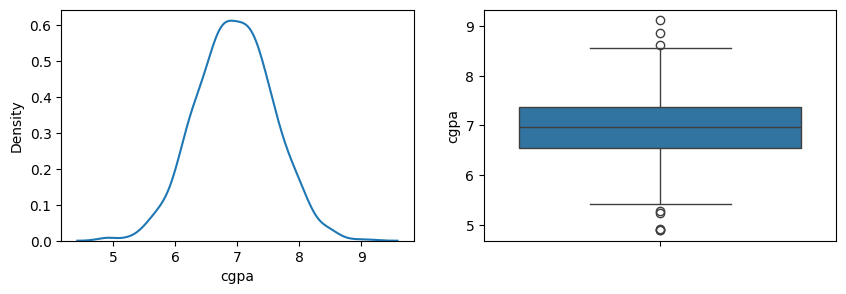

In [6]:
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
sns.kdeplot(df["cgpa"])

plt.subplot(1,2,2)
sns.boxplot(df["cgpa"])

plt.show()

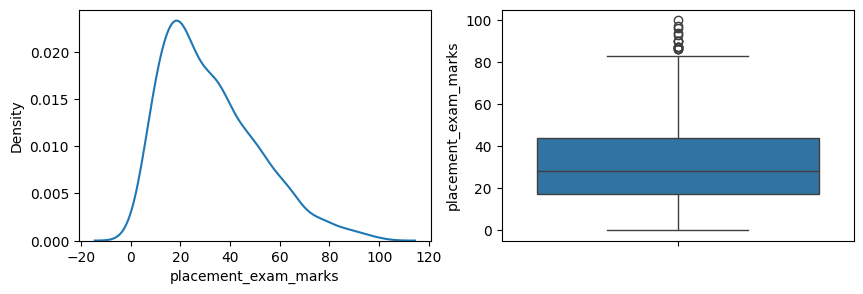

In [7]:
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
sns.kdeplot(df["placement_exam_marks"])

plt.subplot(1,2,2)
sns.boxplot(df["placement_exam_marks"])

plt.show()


In [17]:
upper_percentile = df["placement_exam_marks"].quantile(0.75)
lower_percentile = df["placement_exam_marks"].quantile(0.25)

In [18]:
IQR = upper_percentile - lower_percentile

In [19]:
upper_limit = IQR * 1.5 + upper_percentile
lower_limit = IQR * -1.5 + lower_percentile

In [24]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [25]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


In [26]:
new_df = df[df["placement_exam_marks"] < upper_limit]

In [27]:
new_df.shape

(985, 3)

In [28]:
df["placement_exam_marks"] = np.where(df["placement_exam_marks"] > upper_limit, upper_limit, df["placement_exam_marks"])

In [30]:
df.shape

(1000, 3)

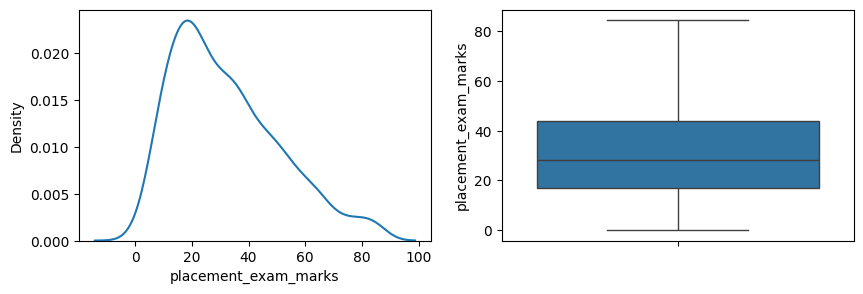

In [31]:
plt.figure(figsize= (10,3))
plt.subplot(1,2,1)
sns.kdeplot(df["placement_exam_marks"])

plt.subplot(1,2,2)
sns.boxplot(df["placement_exam_marks"])

plt.show()
